In [1]:
#############################################################################
####################Import all packages######################################
#############################################################################
import os
import random
import numpy as np
#import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
#import pandas_profiling as pp
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None  # default='warn'
# Set working directory
#############################################################################
# Make Jupyter Notebook show ALL output of a cell, not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
os.getcwd()

'/home/taco/Documents/greta_forarex/script'

In [3]:
#  READING IN DATA
postflight_1 = pd.read_pickle('../new_data/merged_and_processed/postflight_1_processed_until_LateAccess.pkl')




In [4]:
postflight_1.Pressure_LateAccess = postflight_1.Pressure_LateAccess / 10

In [5]:
# Saving to disk the merged files (not yet processed)
# In Pickle format for fast read in
#pre_and_flight.to_pickle('../data/experiment/merged/pre_and_flight_merged.pkl')
#postflight_2.to_pickle('../data/experiment/merged/postflight_1_merged.pkl')
#extra.to_pickle('../data/experiment/merged/extra_merged.pkl')
# In CSV
#pre_and_flight.to_csv('../data/experiment/merged/pre_and_flight_merged.csv')
#postflight_2.to_csv('../data/experiment/merged/postflight_1_merged.csv')
#extra.to_csv('../data/experiment/merged/extra_merged.csv')


In [6]:
## Remove all unncessary columns
cols_to_keep = ['timeStamp',
                'Exp0_OxygenTemp', 'Exp0_OxygenpercentO2', 'Exp0_PhValue',
                'Exp1_OxygenTemp', 'Exp1_OxygenpercentO2',
                'Pressure_LateAccess']

#pre_and_flight = pre_and_flight[cols_to_keep]
postflight_1 = postflight_1[cols_to_keep]
#extra = extra[cols_to_keep]

In [7]:
# DFs contain negligible amount of missing values (NAs), just drop them
#import missingno as msno
#msno.matrix(postflight_1)
#pre_and_flight.dropna(inplace=True)
postflight_1.dropna(inplace=True)
#extra.dropna(inplace=True)

In [8]:
# Naive DateTime TimeStamp needs to be increased by 1hour (UTC+1 for Sweden) compared to what was recorded (apparently UTC, UK)
#pre_and_flight.loc[:,'timeStamp'] = pd.to_datetime(pre_and_flight.timeStamp, unit='s')
#postflight_1.loc[:,'timeStamp'] = pd.to_datetime(postflight_2.timeStamp, unit='s')
#extra.loc[:,'timeStamp'] = pd.to_datetime(extra.timeStamp, unit='s').dt.tz_localize('UTC').dt.tz_convert('Europe/Stockholm')


In [9]:
# Check the data range of the final timestamps
#pre_and_flight.timeStamp.min()
#pre_and_flight.timeStamp.max()
postflight_1.timeStamp.min()
postflight_1.timeStamp.max()
#postflight_2.timeStamp.min()
#postflight_2.timeStamp.max()

#extra.timeStamp.min()
#extra.timeStamp.max()


Timestamp('2019-03-11 12:53:02')

Timestamp('2019-03-14 18:53:49')

In [10]:
#postflight_1.to_pickle(r'~/Documents/greta_forarex/new_data/merged_and_processed/postflight_1.pkl')
#testo = pd.read_pickle(r'~/Documents/greta_forarex/new_data/merged_and_processed/postflight_1.pkl')

In [11]:
# Create different time epochs for convenient plotting & exploration
# Pre and Flight
#pre_and_flight.loc[:, 'year'] = pre_and_flight.timeStamp.dt.year
#pre_and_flight.loc[:, 'month'] = pre_and_flight.timeStamp.dt.month
#pre_and_flight.loc[:, 'day'] = pre_and_flight.timeStamp.dt.day
#pre_and_flight.loc[:, 'hour'] = pre_and_flight.timeStamp.dt.hour
#pre_and_flight.loc[:, 'minute'] = pre_and_flight.timeStamp.dt.minute
#pre_and_flight.loc[:, 'second'] = pre_and_flight.timeStamp.dt.second

# Postflight
#postflight_1.loc[:, 'year'] = postflight_1.timeStamp.dt.year
#postflight_1.loc[:, 'month'] = postflight_1.timeStamp.dt.month
#postflight_1.loc[:, 'day'] = postflight_1.timeStamp.dt.day
#postflight_1.loc[:, 'hour'] = postflight_1.timeStamp.dt.hour
#postflight_1.loc[:, 'minute'] = postflight_1.timeStamp.dt.minute
#postflight_1.loc[:, 'second'] = postflight_1.timeStamp.dt.second

# Extra
#extra.loc[:, 'year'] = extra.timeStamp.dt.year
#extra.loc[:, 'month'] = extra.timeStamp.dt.month
#extra.loc[:, 'day'] = extra.timeStamp.dt.day
#extra.loc[:, 'hour'] = extra.timeStamp.dt.hour
#extra.loc[:, 'minute'] = extra.timeStamp.dt.minute
#extra.loc[:, 'second'] = extra.timeStamp.dt.second

In [12]:
#Wichtige Zeitpunkte:
#- Ende Late Access (LA) 11.03.2019  07:45:58
end_late_access = pd.to_datetime('2019-03-11 07:45:58').tz_localize('Europe/Stockholm')#.tz_convert('Europe/Stockholm')
#- Lift-Off (LO) 11.03.2019  10:19:56  --- 11.03.2019 10:20:00 1552296000 Lift-Off (LO)
lift_off = pd.to_datetime('2019-03-11 10:20:00').tz_localize('Europe/Stockholm')#.tz_convert('Europe/Stockholm')
#- De-Spin (keine Rotierung der Rakete) ~ Nullbewegung in alle Richtungen im Video nach 1 min 7s 38 ms nach LO
de_spin = lift_off + pd.Timedelta('1 minutes 7 seconds')
#- Ende des Raketenantriebs (Motorabwurf, keine Beschleunigung, keine Hypergravitation) 1 min 10 s 20 ms nach LO
end_rocket_propulsion = lift_off + pd.Timedelta('1 minutes 10 seconds')
#- Apogee (Zeitpunkt zu dem die Rakete den höchsten Höhenmeter erreicht hat) 124,4 Sekunden nach LO (errreichte Höhe 82,184 km)
apogee = lift_off + pd.Timedelta('124 seconds')
#- Auswurf 1. Fallschirm ~ 5 min 55 s nach LO
parachute_1 = lift_off + pd.Timedelta('5 minutes 55 seconds')
#- Auswurf 2. Fallschirm ~ 6 min 20 s nach LO
parachute_2 = lift_off + pd.Timedelta('6 minutes 20 seconds')
#- Zeitpunkt der Landung 11.03.2019 10:33:41.800000
landing = pd.to_datetime('2019-03-11 10:33:41').tz_localize('Europe/Stockholm')

In [13]:
#date_diff = pd.to_datetime('2019-03-11  13:20:00') - pd.to_datetime('2000-01-01 14:30:02')
#postflight_1.timeStamp = postflight_1.timeStamp + date_diff



In [16]:
postflight_1.to_csv('../output/postflight_1_plot_table.csv')

In [ ]:
#postflight_1.timeStamp.min()
#postflight_1.timeStamp.max()

(array([737129.5, 737130. , 737130.5, 737131. , 737131.5, 737132. ,
        737132.5]), <a list of 7 Text xticklabel objects>)

Text(0, 0.5, 'Water temperature \n [C°]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Water temperature [Exp0_Flight module]')

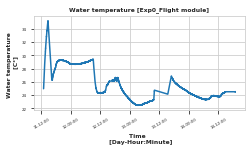

In [18]:
import numpy as np
import matplotlib as mpl
from matplotlib import dates as mdates
import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")

# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

sns.lineplot(
            data= postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1)],
            x = 'timeStamp',
             y = 'Exp0_OxygenTemp'
            )

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Water temperature \n [C°]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Water temperature [Exp0_Flight module]', fontsize='6', fontweight='bold')
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('../output/NEW_postflight/Water_temperature_Exp0_Flight_module.png', dpi=1000)


(array([737129.5, 737130. , 737130.5, 737131. , 737131.5, 737132. ]),
 <a list of 6 Text xticklabel objects>)

Text(0, 0.5, 'Water temperature \n [C°]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Water temperature [Exp1_Flight module]')

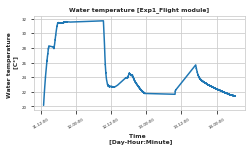

In [19]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

sns.lineplot(
            data=postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp1_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50) & (postflight_1.Exp1_OxygenpercentO2 < 50)  & (postflight_1.Exp1_OxygenpercentO2 > 0) & (postflight_1.Exp0_PhValue < 20) & (postflight_1.Exp0_PhValue > 0)],
            x = 'timeStamp',
             y = 'Exp1_OxygenTemp'
            )

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Water temperature \n [C°]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Water temperature [Exp1_Flight module]', fontsize='6', fontweight='bold')

#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)

fig.savefig('../output//NEW_postflight/Water_temperature_Exp1_Flight_module.png', dpi=1000)
#plt.show()

(array([737129.5, 737130. , 737130.5, 737131. , 737131.5, 737132. ]),
 <a list of 6 Text xticklabel objects>)

Text(0, 0.5, 'Oxygen content \n [%]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Oxygen content [Exp0_Flight module]')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


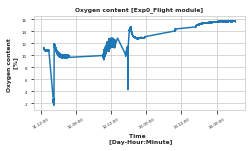

In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

sns.lineplot(
            data=postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp1_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50) & (postflight_1.Exp1_OxygenpercentO2 < 50)  & (postflight_1.Exp1_OxygenpercentO2 > 0) & (postflight_1.Exp0_PhValue < 20) & (postflight_1.Exp0_PhValue > 0)],
            x = 'timeStamp',
             y = 'Exp0_OxygenpercentO2'
            )

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Oxygen content \n [%]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Oxygen content [Exp0_Flight module]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('../output//NEW_postflight/Oxygen_content_Exp0_Flight_module.png', dpi=1000)


(array([737129.5, 737130. , 737130.5, 737131. , 737131.5, 737132. ]),
 <a list of 6 Text xticklabel objects>)

Text(0, 0.5, 'Oxygen content \n [%]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Oxygen content [Exp1_Flight module]')

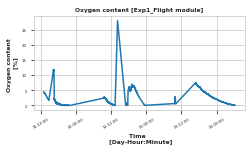

In [21]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

sns.lineplot(
            data=postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp1_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50) & (postflight_1.Exp1_OxygenpercentO2 < 50)  & (postflight_1.Exp1_OxygenpercentO2 > 0) & (postflight_1.Exp0_PhValue < 20) & (postflight_1.Exp0_PhValue > 0)],
            x = 'timeStamp',
             y = 'Exp1_OxygenpercentO2'
            )

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Oxygen content \n [%]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Oxygen content [Exp1_Flight module]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('../output//NEW_postflight/Oxygen_content_Exp1_Flight_module.png', dpi=1000)


In [ ]:
postflight_1.columns

#Water temperature [Exp0_Flight module]
#Water temperature [Exp1_Flight module]
#Oxygen content [Exp0_Flight module]
#Oxygen content [Exp1_Flight module]
#pH Value [Exp0_Flight module]
#Ambient Pressure [Flight module]

(array([737129.5, 737130. , 737130.5, 737131. , 737131.5, 737132. ]),
 <a list of 6 Text xticklabel objects>)

Text(0, 0.5, 'Ambient Pressure [Flight module] \n [hPa]')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'Ambient Pressure [Flight module]')

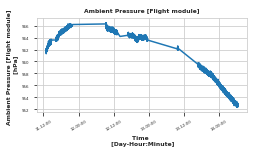

In [24]:
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")

# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

sns.lineplot(
            data=postflight_1[(postflight_1.Pressure_LateAccess < 1300) & (postflight_1.Pressure_LateAccess > 900) & (postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp1_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50) & (postflight_1.Exp1_OxygenpercentO2 < 50)  & (postflight_1.Exp1_OxygenpercentO2 > 0) & (postflight_1.Exp0_PhValue < 20) & (postflight_1.Exp0_PhValue > 0)],
            x = 'timeStamp',
            y = 'Pressure_LateAccess')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("Ambient Pressure [Flight module] \n [hPa]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Ambient Pressure [Flight module]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('../output//NEW_postflight/Ambient_Pressure_Flight_module.png', dpi=1000)




In [30]:
postflight_1['ph_rolling'] = postflight_1.Exp0_PhValue.rolling(100).mean()

(array([737129.5, 737130. , 737130.5, 737131. , 737131.5, 737132. ]),
 <a list of 6 Text xticklabel objects>)

Text(0, 0.5, 'pH Value')

Text(0.5, 0, 'Time  \n [Day-Hour:Minute]')

Text(0.5, 1.0, 'pH Value [Exp0_Flight module]')

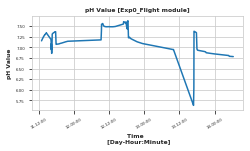

In [31]:
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")

# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.30, right=.99, top=.90)

sns.lineplot(
            data=postflight_1[(postflight_1.Pressure_LateAccess < 1300) & (postflight_1.Pressure_LateAccess > 900) & (postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp1_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50) & (postflight_1.Exp1_OxygenpercentO2 < 50)  & (postflight_1.Exp1_OxygenpercentO2 > 0) & (postflight_1.Exp0_PhValue < 20) & (postflight_1.Exp0_PhValue > 0)],
            x = 'timeStamp',
            y = 'ph_rolling')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
plt.xticks(rotation=30, ha='center', va='top')
#plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=False, direction='out', which='major')

ax.set_ylabel("pH Value", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Day-Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('pH Value [Exp0_Flight module]', fontsize='6', fontweight='bold')
#plt.show()
#figure = plot.get_figure()    
#figure.set_size_inches(28, 10)
#plt.tight_layout()
#figure.savefig('../output/Oxy_test.png', dpi=500)

fig.set_size_inches(width, height)
fig.savefig('../output//NEW_postflight/Exp0_PhValue_Flight_module.png', dpi=1000)




In [25]:
postflight_1.columns

Index(['timeStamp', 'Exp0_OxygenTemp', 'Exp0_OxygenpercentO2', 'Exp0_PhValue', 'Exp1_OxygenTemp', 'Exp1_OxygenpercentO2', 'Pressure_LateAccess'], dtype='object')

In [ ]:
##########################################  DO NOT USE BELOW HERE ##########################################

In [ ]:
##########################################  DO NOT USE BELOW HERE ##########################################

In [ ]:
##########################################  DO NOT USE BELOW HERE ##########################################

In [ ]:
##########################################  DO NOT USE BELOW HERE ##########################################

In [ ]:
##########################################  DO NOT USE BELOW HERE ##########################################

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(22, 8)})
zero = pd.to_datetime('2000-01-01 00:02:46') + date_diff 
end_1 = pd.to_datetime('2000-01-02 00:00:00') + date_diff
end_2 = pd.to_datetime('2000-01-03 00:00:00') + date_diff
end_3 = pd.to_datetime('2000-01-04 00:00:00') + date_diff
end_4 = pd.to_datetime('2000-01-05 00:00:00') + date_diff



sns.lineplot(
            data= postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50)],
            x = 'timeStamp',
             y = 'Exp0_OxygenpercentO2'
            )
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold', fontsize='15')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold', fontsize='15')
#plt.title('Oxygen Temperature over Time', fontsize='17')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d:%H:%M:%S'))
plt.xticks(fontsize=12, rotation=30, ha='center', va='top')
plt.yticks(fontsize=12)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')

In [ ]:
#postflight_1.Exp0_PhValue = postflight_1.Exp0_PhValue[postflight_1.Exp0_PhValue < 20]

postflight_1['roll_ph'] = postflight_1.Exp0_PhValue.rolling(100).mean()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(22, 8)})
zero = pd.to_datetime('2000-01-01 00:02:46') + date_diff 
end_1 = pd.to_datetime('2000-01-02 00:00:00') + date_diff
end_2 = pd.to_datetime('2000-01-03 00:00:00') + date_diff
end_3 = pd.to_datetime('2000-01-04 00:00:00') + date_diff
end_4 = pd.to_datetime('2000-01-05 00:00:00') + date_diff

sns.lineplot(
            data= postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50) & (postflight_1.Exp0_PhValue < 20) & (postflight_1.Exp0_PhValue > 0)],
            x = 'timeStamp',
             y = 'roll_ph'
            )
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold', fontsize='15')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold', fontsize='15')
#plt.title('Oxygen Temperature over Time', fontsize='17')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d:%H:%M:%S'))
plt.xticks(fontsize=12, rotation=30, ha='center', va='top')
plt.yticks(fontsize=12)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(22, 8)})
zero = pd.to_datetime('2000-01-01 00:02:46') + date_diff 
end_1 = pd.to_datetime('2000-01-02 00:00:00') + date_diff
end_2 = pd.to_datetime('2000-01-03 00:00:00') + date_diff
end_3 = pd.to_datetime('2000-01-04 00:00:00') + date_diff
end_4 = pd.to_datetime('2000-01-05 00:00:00') + date_diff

sns.lineplot(
            data= postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp1_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50) & (postflight_1.Exp0_PhValue < 20) & (postflight_1.Exp0_PhValue > 0)],
            x = 'timeStamp',
             y = 'Exp1_OxygenTemp'
            )
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold', fontsize='15')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold', fontsize='15')
#plt.title('Oxygen Temperature over Time', fontsize='17')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d:%H:%M:%S'))
plt.xticks(fontsize=12, rotation=30, ha='center', va='top')
plt.yticks(fontsize=12)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(22, 8)})
zero = pd.to_datetime('2000-01-01 00:02:46') + date_diff 
end_1 = pd.to_datetime('2000-01-02 00:00:00') + date_diff
end_2 = pd.to_datetime('2000-01-03 00:00:00') + date_diff
end_3 = pd.to_datetime('2000-01-04 00:00:00') + date_diff
end_4 = pd.to_datetime('2000-01-05 00:00:00') + date_diff

sns.lineplot(
            data= postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp1_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50) & (postflight_1.Exp1_OxygenpercentO2 < 50)  & (postflight_1.Exp1_OxygenpercentO2 > 0) & (postflight_1.Exp0_PhValue < 20) & (postflight_1.Exp0_PhValue > 0)],
            x = 'timeStamp',
             y = 'Exp1_OxygenpercentO2'
            )
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold', fontsize='15')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold', fontsize='15')
#plt.title('Oxygen Temperature over Time', fontsize='17')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d:%H:%M:%S'))
plt.xticks(fontsize=12, rotation=30, ha='center', va='top')
plt.yticks(fontsize=12)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(22, 8)})
zero = pd.to_datetime('2000-01-01 00:02:46') + date_diff 
end_1 = pd.to_datetime('2000-01-02 00:00:00') + date_diff
end_2 = pd.to_datetime('2000-01-03 00:00:00') + date_diff
end_3 = pd.to_datetime('2000-01-04 00:00:00') + date_diff
end_4 = pd.to_datetime('2000-01-05 00:00:00') + date_diff

sns.lineplot(
            data= postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1) & (postflight_1.Exp1_OxygenTemp >1) & (postflight_1.Exp0_OxygenpercentO2 < 50) & (postflight_1.Exp1_OxygenpercentO2 < 50)  & (postflight_1.Exp1_OxygenpercentO2 > 0) & (postflight_1.Exp0_PhValue < 20) & (postflight_1.Exp0_PhValue > 0)],
            x = 'timeStamp',
             y = 'Pressure_LateAccess'
            )
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold', fontsize='15')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold', fontsize='15')
#plt.title('Oxygen Temperature over Time', fontsize='17')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d:%H:%M:%S'))
plt.xticks(fontsize=12, rotation=30, ha='center', va='top')
plt.yticks(fontsize=12)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')

In [ ]:
#import matplotlib.pyplot as plt
#from matplotlib import dates as mdates
#import seaborn as sns


zero = pd.to_datetime('2000-01-01 00:02:46') + date_diff 
end_1 = pd.to_datetime('2000-01-02 00:00:00') + date_diff
end_2 = pd.to_datetime('2000-01-03 00:00:00') + date_diff
end_3 = pd.to_datetime('2000-01-04 00:00:00') + date_diff
end_4 = pd.to_datetime('2000-01-05 00:00:00') + date_diff

import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(3.5, 1.25)})


plot = sns.lineplot(
            data= postflight_1[(postflight_1.Exp0_OxygenTemp <60) & (postflight_1.Exp0_OxygenTemp >1)],
            x = 'timeStamp',
             y = 'Exp0_OxygenTemp'
            )
plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold', fontsize='3')
plt.xlabel("Time  \n [D:H:M:S]", fontweight='bold', fontsize='3')
plt.title('Oxygen Temperature over Time', fontsize='3')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d:%H:%M:%S'))
plt.xticks(fontsize=3, rotation=30, ha='center', va='top')
plt.yticks(fontsize=3)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')
#plt.show()
figure = plot.get_figure()    
figure.set_size_inches(28, 10)
plt.tight_layout()
figure.savefig('../output/Oxy_test.png', dpi=500)


In [ ]:
#postflight_1.columns
#postflight_1.dtypes
postflight_1.Pressure_LateAccess.min()
postflight_1.Pressure_LateAccess.max()



In [ ]:
postflight_1.groupby(['day','hour','minute']).mean()

In [ ]:
# Sort DF by timeStamp
#pre_and_flight.sort_values(by='timeStamp', axis=0, ascending=True, inplace=True)
postflight_1.sort_values(by='timeStamp', axis=0, ascending=True, inplace=True)
#extra.sort_values(by='timeStamp', axis=0, ascending=True, inplace=True)
# Make timestamp index of DF for easier plotting
#pre_and_flight.set_index('timeStamp', inplace=True)
#postflight.set_index('timeStamp', inplace=True)

In [ ]:
postflight_1.sort_values('timeStamp', inplace=True)
postflight_1 = postflight_1.reset_index()


In [ ]:
# Scale columns values 

# Pre-and flight
#pre_and_flight.loc[:,'Exp0_OxygenTemp'] = pre_and_flight.Exp0_OxygenTemp/1000
#pre_and_flight.loc[:,'Exp1_OxygenTemp'] = pre_and_flight.Exp1_OxygenTemp/1000
#pre_and_flight.loc[:,'Exp0_OxygenpercentO2'] = pre_and_flight.Exp0_OxygenpercentO2/1000
#pre_and_flight.loc[:,'Exp1_OxygenpercentO2'] = pre_and_flight.Exp1_OxygenpercentO2/1000

# Postflight
postflight_1.loc[:,'Exp0_OxygenTemp'] = postflight_1.Exp0_OxygenTemp/1000
postflight_1.loc[:,'Exp1_OxygenTemp'] = postflight_1.Exp1_OxygenTemp/1000
postflight_1.loc[:,'Exp0_OxygenpercentO2'] = postflight_1.Exp0_OxygenpercentO2/1000
postflight_1.loc[:,'Exp1_OxygenpercentO2'] = postflight_1.Exp1_OxygenpercentO2/1000
postflight_1.loc[:,'Exp0_PhValue'] = postflight_1.Exp0_PhValue/1000






In [ ]:
# Saving to disk
# In Pickle format for fast read in
#pre_and_flight.to_pickle('../data/experiment/processed/pre_and_flight_merged.pkl')
#postflight.to_pickle('../data/experiment/processed//postflight_merged.pkl')

# In CSV
#pre_and_flight.to_csv('../data/experiment/processed//pre_and_flight_merged.csv')
#postflight.to_csv('../data/experiment/processed//postflight_merged.csv')



In [ ]:
# Pandas Profiling conveniently returns an extensive report with descriptive statistics for each DF
#pre_and_flight.profile_report(style={'full_width':True})
#postflight.profile_report(style={'full_width':True})

In [ ]:
# Explore which year, days, hours and minutes were actually recorded
#plt.figure(figsize=(18, 6))
#pre_and_flight.set_index('timeStamp', inplace=True)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start].Exp0_OxygenTemp
            )

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
   
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, 34, 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, 34.1, 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, 33.2, 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, 32, 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, 31, 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, 32.5, 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, 32.2, 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, 32, 'Landing', horizontalalignment='left', size='small', color='black')


# get current axis
#ax = plt.gca()
# get current xtick labels
ax.fmt_xdata = dates.DateFormatter('%H:%M:%S')
# convert all xtick labels to selected format from ms timestamp
#ax.set_xticklabels(pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp.dt.strftime('%H:%M:%S') ,
# rotation=50)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp >= lift_off].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp >= lift_off].Exp0_OxygenTemp
            )

events_list = [lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
   
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')

plt.text(lift_off, 33.1, 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, 33.2, 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, 33.6, 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, 33, 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, 33.1, 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, 33.4, 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, 33.1, 'Landing', horizontalalignment='left', size='small', color='black')


# get current axis
#ax = plt.gca()
# get current xtick labels
#ax.fmt_xdata = dates.DateFormatter('%H:%M:%S')
# convert all xtick labels to selected format from ms timestamp
#ax.set_xticklabels(pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp.dt.strftime('%H:%M:%S') ,
# rotation=50)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]]
            )

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
ylimits = ax.get_ylim()
import random
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, random.uniform(ylimits[0],ylimits[1]), 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, random.uniform(ylimits[0],ylimits[1]), 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, random.uniform(ylimits[0],ylimits[1]), 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, random.uniform(ylimits[0],ylimits[1]), 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, random.uniform(ylimits[0],ylimits[1]), 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, random.uniform(ylimits[0],ylimits[1]), 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, random.uniform(ylimits[0],ylimits[1]), 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, random.uniform(ylimits[0],ylimits[1]), 'Landing', horizontalalignment='left', size='small', color='black')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
ax = sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]]
            )

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]].max()

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, random.uniform(y_min,y_max), 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, random.uniform(y_min,y_max), 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, random.uniform(y_min,y_max), 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, random.uniform(y_min,y_max), 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, random.uniform(y_min,y_max), 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, random.uniform(y_min,y_max), 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, random.uniform(y_min,y_max), 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, random.uniform(y_min,y_max), 'Landing', horizontalalignment='left', size='small', color='black')

from matplotlib.ticker import AutoMinorLocator, AutoLocator
from matplotlib.dates import DateFormatter
#ax.xaxis.set_major_locator()
#ax.xaxis.set_minor_locator(AutoMinorLocator())
myFmt = DateFormatter("%H/%M") 
ax.xaxis.set_major_formatter(myFmt) 
 

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[2]]
            )

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[2]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[2]].max()

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, random.uniform(y_min,y_max), 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, random.uniform(y_min,y_max), 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, random.uniform(y_min,y_max), 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, random.uniform(y_min,y_max), 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, random.uniform(y_min,y_max), 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, random.uniform(y_min,y_max), 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, random.uniform(y_min,y_max), 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, random.uniform(y_min,y_max), 'Landing', horizontalalignment='left', size='small', color='black')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[3]]
            )

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[3]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[3]].max()

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, random.uniform(y_min,y_max), 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, random.uniform(y_min,y_max), 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, random.uniform(y_min,y_max), 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, random.uniform(y_min,y_max), 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, random.uniform(y_min,y_max), 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, random.uniform(y_min,y_max), 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, random.uniform(y_min,y_max), 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, random.uniform(y_min,y_max), 'Landing', horizontalalignment='left', size='small', color='black')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[4]]
            )

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[4]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[4]].max()

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, random.uniform(y_min,y_max), 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, random.uniform(y_min,y_max), 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, random.uniform(y_min,y_max), 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, random.uniform(y_min,y_max), 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, random.uniform(y_min,y_max), 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, random.uniform(y_min,y_max), 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, random.uniform(y_min,y_max), 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, random.uniform(y_min,y_max), 'Landing', horizontalalignment='left', size='small', color='black')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[5]]
            )

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[5]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[5]].max()

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, random.uniform(y_min,y_max), 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, random.uniform(y_min,y_max), 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, random.uniform(y_min,y_max), 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, random.uniform(y_min,y_max), 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, random.uniform(y_min,y_max), 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, random.uniform(y_min,y_max), 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, random.uniform(y_min,y_max), 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, random.uniform(y_min,y_max), 'Landing', horizontalalignment='left', size='small', color='black')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
flight_start = pd.to_datetime('2019-03-11 10:01').tz_localize('Europe/Stockholm')
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[6]]
            )

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[6]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[6]].max()

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')
#plt.axvline(x=flight_start, color = 'black')
#plt.axvline(x=lift_off, color = 'blue')
#plt.axvline(x=de_spin, color = 'red')
#plt.axvline(x=end_rocket_propulsion, color = 'r')
#plt.axvline(x=apogee, color = 'r')
#plt.axvline(x=parachute_1, color = 'grey')
#plt.axvline(x=parachute_2, color = 'grey')
#plt.axvline(x=landing, color = 'black')
plt.text(flight_start, random.uniform(y_min,y_max), 'Flight Start', horizontalalignment='left', size='small', color='black')
plt.text(lift_off, random.uniform(y_min,y_max), 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, random.uniform(y_min,y_max), 'De Spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, random.uniform(y_min,y_max), 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(apogee, random.uniform(y_min,y_max), 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, random.uniform(y_min,y_max), 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, random.uniform(y_min,y_max), 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, random.uniform(y_min,y_max), 'Landing', horizontalalignment='left', size='small', color='black')

plt.show()